# Verification of NRTidal notebook

Here we show the (mis)matches we obtained with our NRTidal code to check the implementation. Idea is to run the check_NRTidal py script under test, which saves the samples with parameters and match values to a CSV, and then load it and analyze it here.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

# from ripple.waveforms import IMRPhenomD
from ripple.waveforms.X_NRTidalv2 import _get_merger_frequency
import matplotlib.pyplot as plt
from ripple import ms_to_Mc_eta
from ripple.constants import MSUN, gt
from jax import grad, vmap
from functools import partial
# import importlib
# import tqdm

%load_ext autoreload
%autoreload 2
from ripple.waveforms import X_NRTidalv2

# To get plot style
import requests
script_url = "https://raw.githubusercontent.com/ThibeauWouters/cheat_sheets/main/myploystyle.py"
exec(requests.get(script_url).text)

jax.config.update("jax_enable_x64", True) # improve precision for comparing waveforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import os
import pandas as pd
os.getcwd()

'/Users/Woute029/Documents/Code/ripple/notebooks'

## Load in match files

In [21]:
matches_filename = os.path.join(os.getcwd(), "../test/NRTidal_matches.csv")
print(f"Reading in NRTidal matches from {matches_filename}")
matches_df = pd.read_csv(matches_filename)
matches_df["mismatch"] = np.log10(1 - matches_df["match"])
matches_df

Reading in NRTidal matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/NRTidal_matches.csv


,Unnamed: 0,m1,m2,chi1,chi2,lambda1,lambda2,match,mismatch
0,0,2.906405,1.632205,0.0,0.0,3791.499428,3791.499428,1.0,-9.725751
1,1,1.371424,1.124085,0.0,0.0,4282.300719,4282.300719,1.0,-8.833846
2,2,2.357157,1.116162,0.0,0.0,2889.667483,2889.667483,1.0,-9.234707
3,3,2.172777,1.907673,0.0,0.0,2567.412643,2567.412643,1.0,-9.619141
4,4,1.224060,1.021249,0.0,0.0,2859.725776,2859.725776,1.0,-8.674945
...,...,...,...,...,...,...,...,...,...
995,995,2.894703,1.656102,0.0,0.0,1932.334395,1932.334395,1.0,-9.729130
996,996,2.380312,1.874599,0.0,0.0,3416.445859,3416.445859,1.0,-9.680321
997,997,2.684764,1.436136,0.0,0.0,93.048962,93.048962,1.0,-9.523434
998,998,2.352917,1.074732,0.0,0.0,1817.655411,1817.655411,1.0,-9.201918


## Fixing NaNs in code

In [22]:
# filtered_df = matches_df[matches_df['match'].isna()]
# mass_values = filtered_df["m1"]
# lambda_values = filtered_df["lambda1"]
# # match_values = filtered_df["match"]
# # mismatch_values = np.log10(1 - match_values)
# plt.scatter(mass_values, lambda_values)
# plt.show()

# # Show an example of a NaN param combination
# print(mass_values[0])
# print(lambda_values[0])

## Look at match values

In [23]:
mass_values = matches_df["m1"] + matches_df["m2"]
lambda1_values = matches_df["lambda1"]
lambda2_values = matches_df["lambda2"]
match_values = matches_df["match"]
mismatch_values = matches_df["mismatch"]

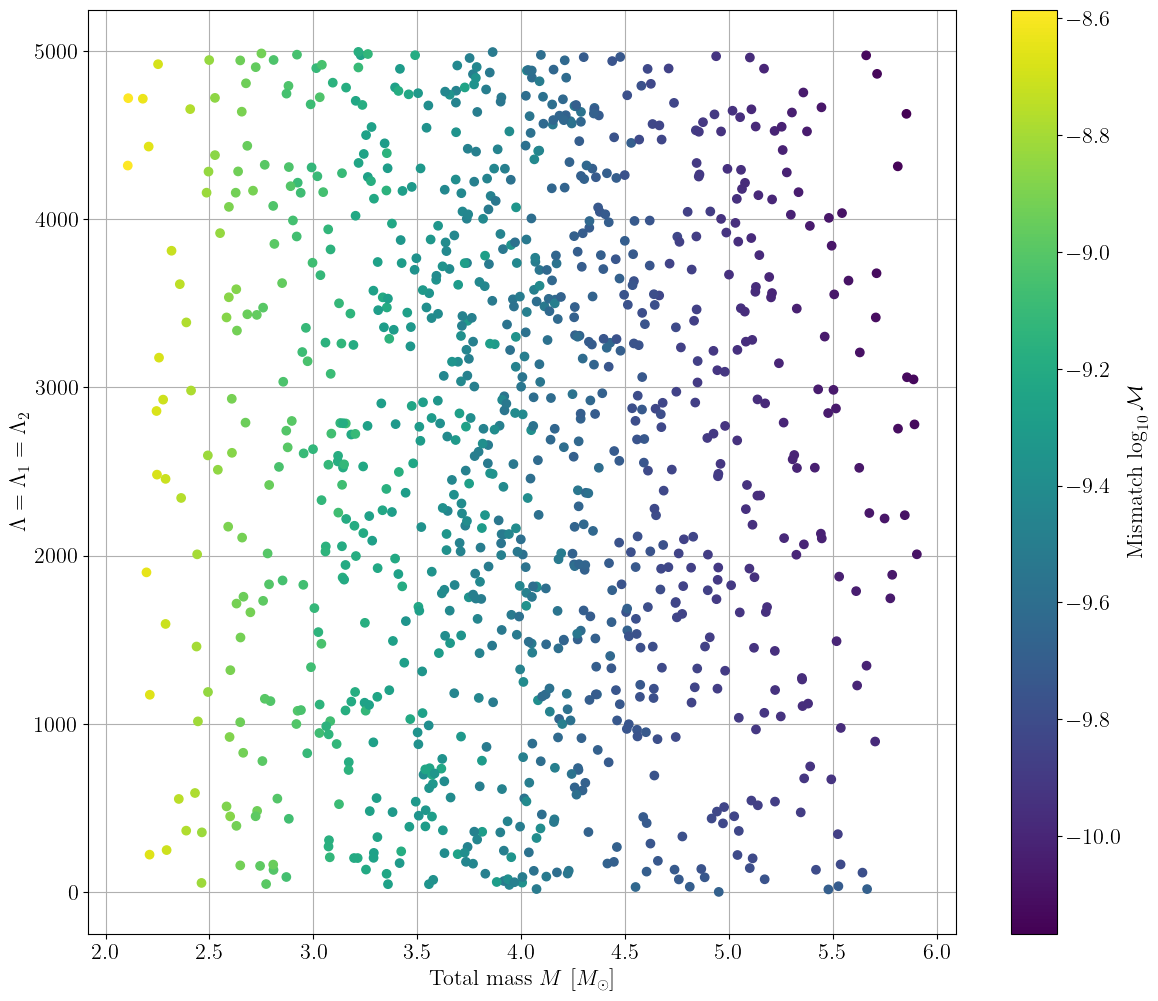

In [24]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(mass_values, lambda1_values, c = mismatch_values, zorder=100)
plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"$\Lambda = \Lambda_1 = \Lambda_2$")
# plt.title(r"Unequal mass, non-spinning")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
plt.savefig("../test/figures/matches_NRTidal.pdf", bbox_inches = 'tight')
plt.savefig("../test/figures/matches_NRTidal.png", bbox_inches = 'tight')
plt.show()

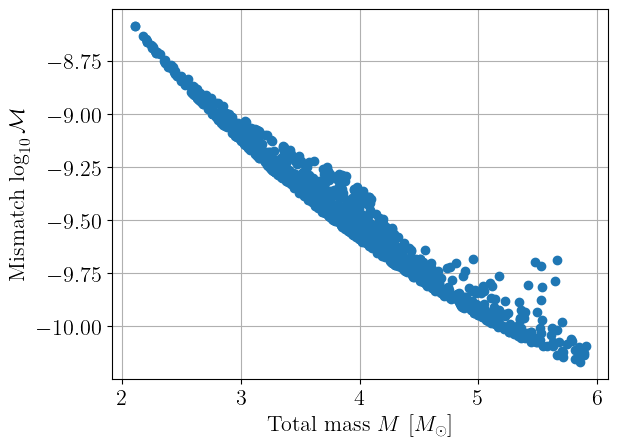

In [25]:
plt.scatter(mass_values, mismatch_values, zorder=100)
plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.title(r"Unequal mass, non-spinning")
plt.savefig("../test/figures/matches_NRTidal_M_vs_mismatch.png", bbox_inches = 'tight')
plt.show()

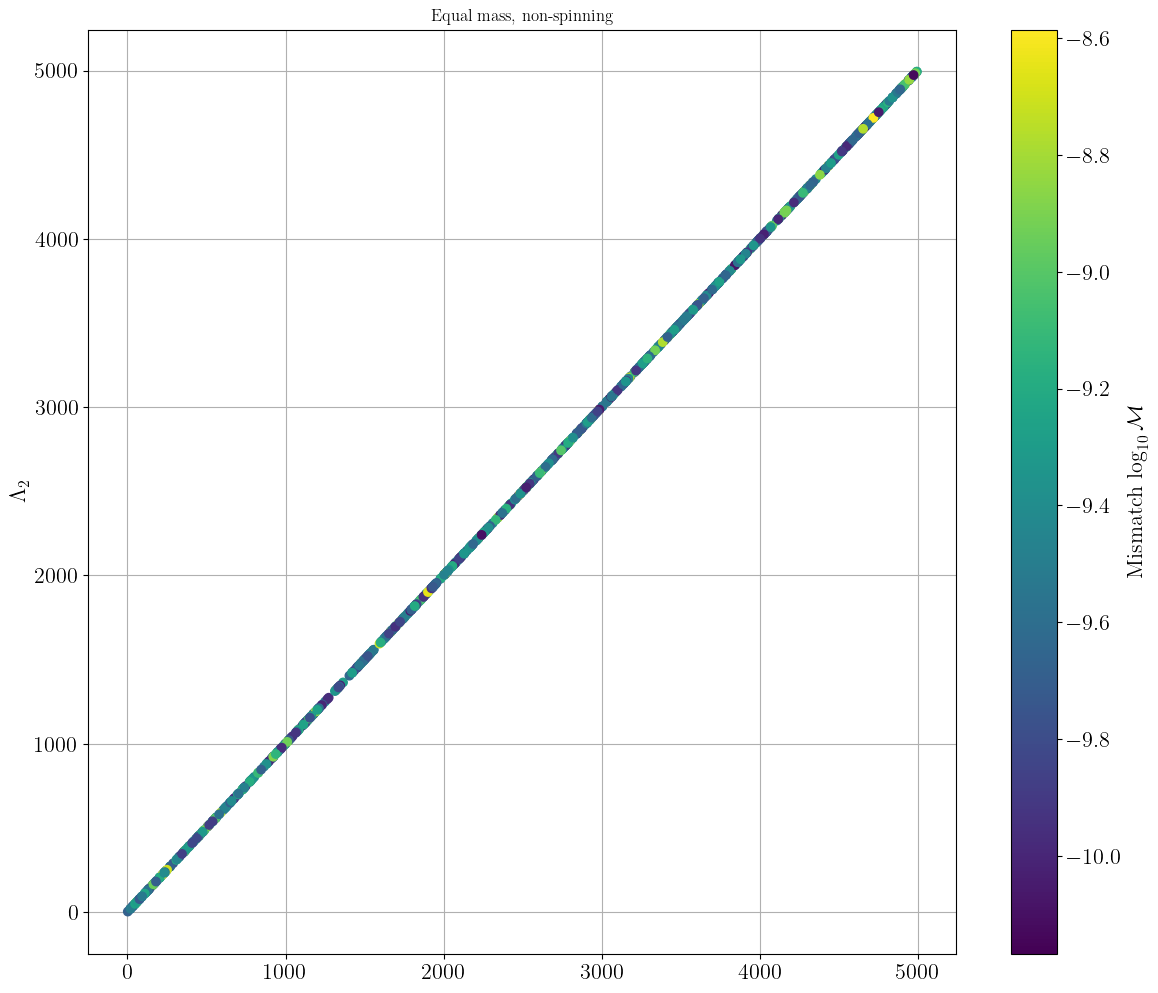

In [26]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(lambda1_values, lambda2_values, c = mismatch_values, zorder=100)
plt.ylabel(r"$\Lambda_2$")
plt.ylabel(r"$\Lambda_2$")
plt.title(r"Equal mass, non-spinning")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
plt.savefig("../test/figures/matches_NRTidal_lambda1_lambda2.pdf", bbox_inches = 'tight')
plt.savefig("../test/figures/matches_NRTidal_lambda1_lambda2.png", bbox_inches = 'tight')
plt.show()

Getting sense of magnitude of merger frequency

In [27]:
m = 3
l = 4000
theta = np.array([m, m, 0, 0, l, l])
f_merger = _get_merger_frequency(theta)
f_merger

Array(531.10743693, dtype=float64)